In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import numpy as np
import seaborn as sns
sns.set_style('dark')

from itertools import chain
from collections import Counter
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## Label

Text(0, 0.5, 'Count')

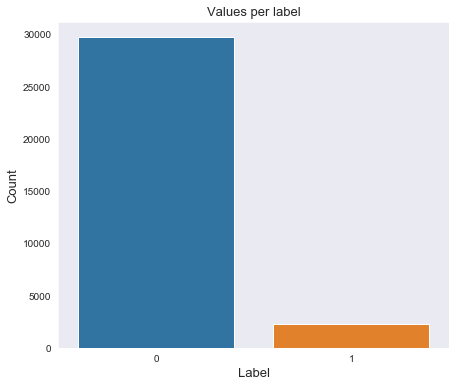

In [4]:
plt.figure(figsize=(7, 6))
sns.countplot(data=train, x='label')
plt.title('Values per label', fontsize=13)
plt.xlabel('Label', fontsize=13)
plt.ylabel('Count', fontsize=13)

## Tweet

### Hashtags

In [5]:
def detect_hashtags(text):
    text = str(text)
    count = re.findall(r'\#[\w]+', text)
    return len(count)

In [6]:
train['hashtags'] = train['tweet'].apply(detect_hashtags)
train.head()

,id,label,tweet,hashtags
0,1,0,@user when a father is dysfunctional and is s...,1
1,2,0,@user @user thanks for #lyft credit i can't us...,3
2,3,0,bihday your majesty,0
3,4,0,#model i love u take with u all the time in ...,1
4,5,0,factsguide: society now #motivation,1


Text(0, 0.5, 'Label')

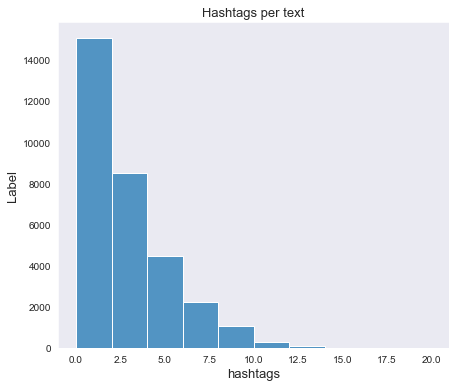

In [7]:
plt.figure(figsize=(7, 6))
sns.histplot(data=train, x='hashtags', binwidth=2)
plt.title('Hashtags per text', fontsize=13)
plt.xlabel('hashtags', fontsize=13)
plt.ylabel('Label', fontsize=13)

In [51]:
print('Max hashtags per text: {}'.format(max(train['hashtags'])))

Max hashtags per text: 20


In [50]:
print(train['tweet'][np.argmax(train['hashtags'])])

ðð»#pretending#to#be #when #you're#in#pain#is#just#an#example #of#how#strong#you#are#as#a #personðð» ððªð»ðªð»ðªð» #nightyð´


### Usernames

In [8]:
def detect_usernames(text):
    text = str(text)
    count = re.findall(r'\@[\w]+', text)
    return len(count)

In [9]:
train['usernames'] = train['tweet'].apply(detect_usernames)
train.head()

,id,label,tweet,hashtags,usernames
0,1,0,@user when a father is dysfunctional and is s...,1,1
1,2,0,@user @user thanks for #lyft credit i can't us...,3,2
2,3,0,bihday your majesty,0,0
3,4,0,#model i love u take with u all the time in ...,1,0
4,5,0,factsguide: society now #motivation,1,0


Text(0, 0.5, 'Label')

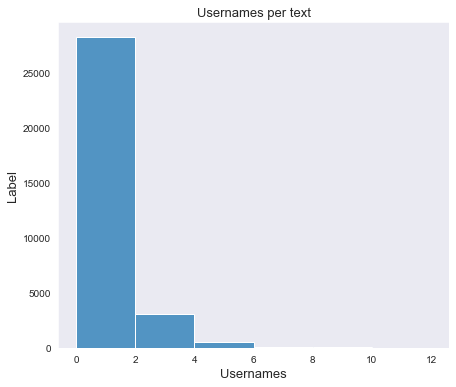

In [10]:
plt.figure(figsize=(7, 6))
sns.histplot(data=train, x='usernames', binwidth=2)
plt.title('Usernames per text', fontsize=13)
plt.xlabel('Usernames', fontsize=13)
plt.ylabel('Label', fontsize=13)

In [48]:
print('Max usernames (mentions) per text: {}'.format(max(train['usernames'])))

Max usernames (mentions) per text: 11


In [49]:
print(train['tweet'][np.argmax(train['usernames'])])

 @user @user @user @user @user @user @user @user @user @user @user


### Words

In [11]:
def count_words(text):
    text = str(text)
    text = text.split(' ')
    return len(text)

In [12]:
train['words'] = train['tweet'].apply(count_words)
train.head()

,id,label,tweet,hashtags,usernames,words
0,1,0,@user when a father is dysfunctional and is s...,1,1,21
1,2,0,@user @user thanks for #lyft credit i can't us...,3,2,22
2,3,0,bihday your majesty,0,0,5
3,4,0,#model i love u take with u all the time in ...,1,0,17
4,5,0,factsguide: society now #motivation,1,0,8


Text(0, 0.5, 'Label')

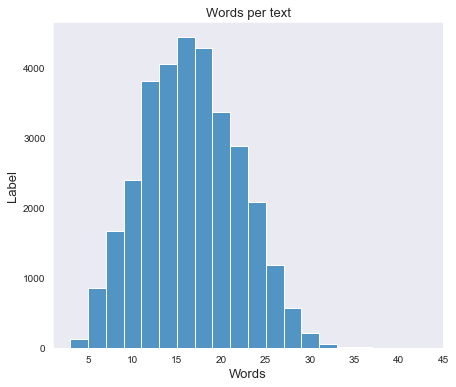

In [13]:
plt.figure(figsize=(7, 6))
sns.histplot(data=train, x='words', binwidth=2)
plt.title('Words per text', fontsize=13)
plt.xlabel('Words', fontsize=13)
plt.ylabel('Label', fontsize=13)

In [44]:
print('Max characters per text: {}'.format(max(train['words'])))

Max characters per text: 43


In [45]:
print(train['tweet'][np.argmax(train['words'])])

the greatest gift i ever had         came from #god          i call him  #dad ó¾ó¾ó¾    #father's #day......!!  ó¾ ó¾ â feeling proud


### Numbers

In [14]:
def count_numbers(text):
    text = str(text)
    count = re.findall(r'\d', text)
    return len(count)

In [15]:
train['numbers'] = train['tweet'].apply(count_numbers)
train.head()

,id,label,tweet,hashtags,usernames,words,numbers
0,1,0,@user when a father is dysfunctional and is s...,1,1,21,0
1,2,0,@user @user thanks for #lyft credit i can't us...,3,2,22,0
2,3,0,bihday your majesty,0,0,5,0
3,4,0,#model i love u take with u all the time in ...,1,0,17,0
4,5,0,factsguide: society now #motivation,1,0,8,0


Text(0, 0.5, 'Label')

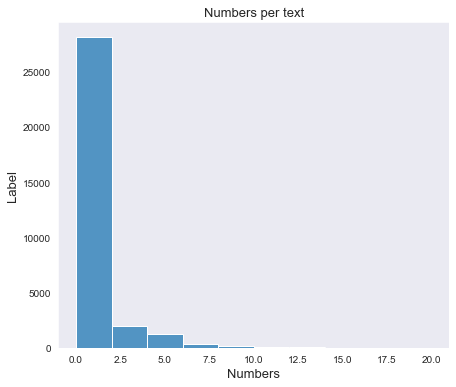

In [16]:
plt.figure(figsize=(7, 6))
sns.histplot(data=train, x='numbers', binwidth=2)
plt.title('Numbers per text', fontsize=13)
plt.xlabel('Numbers', fontsize=13)
plt.ylabel('Label', fontsize=13)

In [41]:
print('Max numbers per text: {}'.format(max(train['numbers'])))

Max numbers per text: 20


In [42]:
print(train['tweet'][np.argmax(train['numbers'])])

 @user be happy ðâï¸anchored recoveryâï¸ð 714-603-8860 or 949-510-3102 #anchored#recovery#treatment #good#positive 


### Characters

In [17]:
def count_characters(text):
    text = str(text)
    count = re.findall(r'\w', text)
    return len(count)

In [18]:
train['characters'] = train['tweet'].apply(count_characters)
train.head()

,id,label,tweet,hashtags,usernames,words,numbers,characters
0,1,0,@user when a father is dysfunctional and is s...,1,1,21,0,79
1,2,0,@user @user thanks for #lyft credit i can't us...,3,2,22,0,93
2,3,0,bihday your majesty,0,0,5,0,17
3,4,0,#model i love u take with u all the time in ...,1,0,17,0,42
4,5,0,factsguide: society now #motivation,1,0,8,0,30


Text(0, 0.5, 'Label')

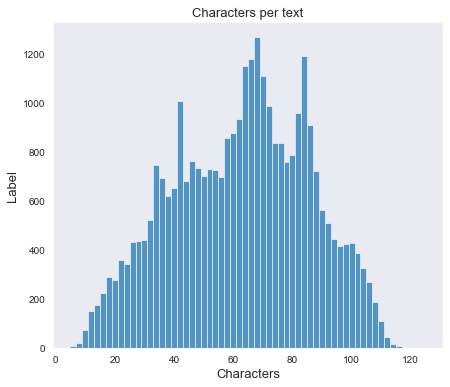

In [19]:
plt.figure(figsize=(7, 6))
sns.histplot(data=train, x='characters', binwidth=2)
plt.title('Characters per text', fontsize=13)
plt.xlabel('Characters', fontsize=13)
plt.ylabel('Label', fontsize=13)

In [40]:
print('Max characters per text: {}'.format(max(train['characters'])))

Max characters per text: 125


In [43]:
print(train['tweet'][np.argmax(train['characters'])])

@user hititonthehead! #killarypeople,needtoreallyreadaboutherbackgroundevenifitsonlyfor08compare#shegotworseithink#butbadfromthegetgo


### Special Characters

In [20]:
def count_special_characters(text):
    text = str(text)
    count = re.findall(r'[^\w\s]', text)
    return len(count)

In [21]:
train['specials'] = train['tweet'].apply(count_special_characters)
train.head()

,id,label,tweet,hashtags,usernames,words,numbers,characters,specials
0,1,0,@user when a father is dysfunctional and is s...,1,1,21,0,79,3
1,2,0,@user @user thanks for #lyft credit i can't us...,3,2,22,0,93,8
2,3,0,bihday your majesty,0,0,5,0,17,0
3,4,0,#model i love u take with u all the time in ...,1,0,17,0,42,27
4,5,0,factsguide: society now #motivation,1,0,8,0,30,2


Text(0, 0.5, 'Label')

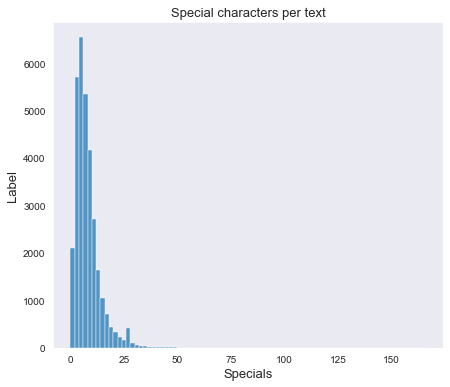

In [30]:
plt.figure(figsize=(7, 6))
sns.histplot(data=train, x='specials', binwidth=2)
plt.title('Special characters per text', fontsize=13)
plt.xlabel('Specials', fontsize=13)
plt.ylabel('Label', fontsize=13)

In [33]:
print('Max special characters per text: {}'.format(max(train['specials'])))

Max special characters per text: 165


In [38]:
print(train['tweet'][np.argmax(train['specials'])])

awesom beautiful wonderfulððððððððððððð±ð±ð±ð±ð±ð±ðððððððððððððððððððððððððððððððððð»ð»ð»ð» 


### Stopwords

In [23]:
def count_stopwords(text):
    text = str(text)
    count = [word for word in text.split(' ') if word in stop_words]
    return len(count)

In [24]:
train['stopwords'] = train['tweet'].apply(count_stopwords)
train.head()

,id,label,tweet,hashtags,usernames,words,numbers,characters,specials,stopwords
0,1,0,@user when a father is dysfunctional and is s...,1,1,21,0,79,3,10
1,2,0,@user @user thanks for #lyft credit i can't us...,3,2,22,0,93,8,5
2,3,0,bihday your majesty,0,0,5,0,17,0,1
3,4,0,#model i love u take with u all the time in ...,1,0,17,0,42,27,5
4,5,0,factsguide: society now #motivation,1,0,8,0,30,2,1


Text(0, 0.5, 'Label')

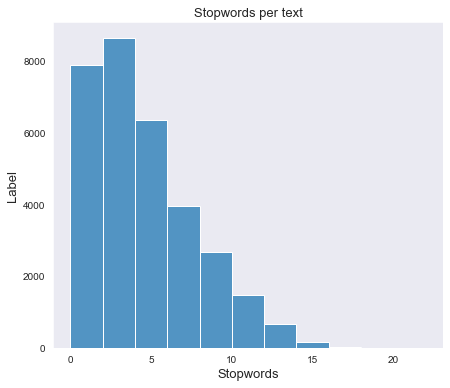

In [25]:
plt.figure(figsize=(7, 6))
sns.histplot(data=train, x='stopwords', binwidth=2)
plt.title('Stopwords per text', fontsize=13)
plt.xlabel('Stopwords', fontsize=13)
plt.ylabel('Label', fontsize=13)

In [32]:
print('Max stopwords per text: {}'.format(max(train['stopwords'])))

Max stopwords per text: 22


### Word count

In [58]:
counter = Counter(chain.from_iterable(map(str.split, train['tweet'].tolist())))

In [68]:
common_words = counter.most_common(20)
common_words

[('@user', 17291),
 ('the', 10065),
 ('to', 9768),
 ('a', 6261),
 ('i', 5655),
 ('you', 4949),
 ('and', 4831),
 ('in', 4570),
 ('for', 4435),
 ('of', 4152),
 ('is', 4102),
 ('my', 3626),
 ('on', 2554),
 ('with', 2482),
 ('this', 2462),
 ('be', 2373),
 ('it', 2100),
 ('so', 1889),
 ('all', 1823),
 ('are', 1802)]

In [74]:
def check_stopword(common_words):
    common_words = [(word[0], 'yes') if word[0] in stop_words else (word[0], 'no') for word in common_words]
    return common_words

In [75]:
check_stopword(common_words)

[('@user', 'no'),
 ('the', 'yes'),
 ('to', 'yes'),
 ('a', 'yes'),
 ('i', 'yes'),
 ('you', 'yes'),
 ('and', 'yes'),
 ('in', 'yes'),
 ('for', 'yes'),
 ('of', 'yes'),
 ('is', 'yes'),
 ('my', 'yes'),
 ('on', 'yes'),
 ('with', 'yes'),
 ('this', 'yes'),
 ('be', 'yes'),
 ('it', 'yes'),
 ('so', 'yes'),
 ('all', 'yes'),
 ('are', 'yes')]

### Word count per label

In [77]:
#label 0
train_label_zero = train.copy()
train_label_zero = train_label_zero[train_label_zero['label'] == 0]
counter_zero = Counter(chain.from_iterable(map(str.split, train_label_zero['tweet'].tolist())))
counter_zero = counter_zero.most_common(35)
counter_zero

[('@user', 15465),
 ('the', 9249),
 ('to', 9207),
 ('a', 5654),
 ('i', 5455),
 ('you', 4555),
 ('and', 4473),
 ('for', 4196),
 ('in', 4147),
 ('of', 3695),
 ('is', 3677),
 ('my', 3556),
 ('with', 2369),
 ('on', 2345),
 ('this', 2294),
 ('be', 2172),
 ('it', 1977),
 ('so', 1806),
 ('all', 1743),
 ('that', 1593),
 ('your', 1584),
 ('at', 1540),
 ('have', 1503),
 ('are', 1488),
 ('day', 1448),
 ('#love', 1439),
 ('happy', 1318),
 ('&amp;', 1307),
 ('just', 1256),
 ('when', 1181),
 ('will', 1177),
 ('-', 1163),
 ('we', 1159),
 ('me', 1148),
 ('am', 1138)]

In [78]:
check_stopword(counter_zero)

[('@user', 'no'),
 ('the', 'yes'),
 ('to', 'yes'),
 ('a', 'yes'),
 ('i', 'yes'),
 ('you', 'yes'),
 ('and', 'yes'),
 ('for', 'yes'),
 ('in', 'yes'),
 ('of', 'yes'),
 ('is', 'yes'),
 ('my', 'yes'),
 ('with', 'yes'),
 ('on', 'yes'),
 ('this', 'yes'),
 ('be', 'yes'),
 ('it', 'yes'),
 ('so', 'yes'),
 ('all', 'yes'),
 ('that', 'yes'),
 ('your', 'yes'),
 ('at', 'yes'),
 ('have', 'yes'),
 ('are', 'yes'),
 ('day', 'no'),
 ('#love', 'no'),
 ('happy', 'no'),
 ('&amp;', 'no'),
 ('just', 'yes'),
 ('when', 'yes'),
 ('will', 'yes'),
 ('-', 'no'),
 ('we', 'yes'),
 ('me', 'yes'),
 ('am', 'yes')]

In [79]:
#label 1
train_label_one = train.copy()
train_label_one = train_label_one[train_label_one['label'] == 1]
counter_one = Counter(chain.from_iterable(map(str.split, train_label_one['tweet'].tolist())))
counter_one = counter_one.most_common(20)
counter_one

[('@user', 1826),
 ('the', 816),
 ('a', 607),
 ('to', 561),
 ('of', 457),
 ('is', 425),
 ('in', 423),
 ('you', 394),
 ('and', 358),
 ('are', 314),
 ('&amp;', 267),
 ('for', 239),
 ('on', 209),
 ('be', 201),
 ('i', 200),
 ('this', 168),
 ('that', 164),
 ('â\x80¦', 160),
 ('not', 148),
 ('like', 131)]

In [80]:
check_stopword(counter_one)

[('@user', 'no'),
 ('the', 'yes'),
 ('a', 'yes'),
 ('to', 'yes'),
 ('of', 'yes'),
 ('is', 'yes'),
 ('in', 'yes'),
 ('you', 'yes'),
 ('and', 'yes'),
 ('are', 'yes'),
 ('&amp;', 'no'),
 ('for', 'yes'),
 ('on', 'yes'),
 ('be', 'yes'),
 ('i', 'yes'),
 ('this', 'yes'),
 ('that', 'yes'),
 ('â\x80¦', 'no'),
 ('not', 'yes'),
 ('like', 'no')]